# SD212: Graph Learning
## Lab 4: Hierarchical Clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [1]:
from IPython.display import SVG, Markdown

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainIteration, Paris, cut_straight
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph, visualize_dendrogram

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paristech.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), a small graph with ground-truth clusters.

In [64]:
dataset = karate_club(True)

In [65]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

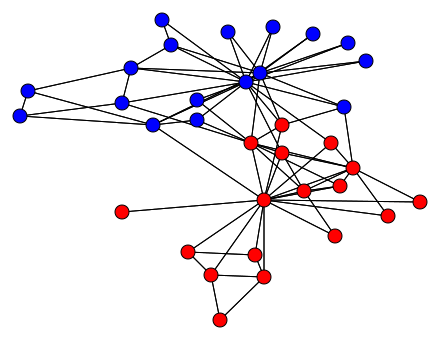

In [66]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm (divisive algorithm, top-down).
* Display the dendrogram.
* How many clusters are there at depth 1?
* Display the graph with the corresponding clustering.
* How many clusters are there at depth 2?

In [67]:
louvain = LouvainIteration()

In [68]:
dendrogram = louvain.fit_predict(adjacency)

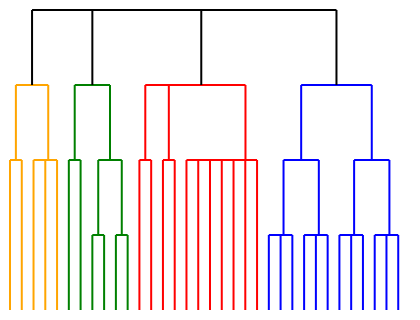

In [69]:
image = visualize_dendrogram(dendrogram)
SVG(image)

In [70]:
height = int(dendrogram[-1, 2])

There are 4 clusters at depth 1


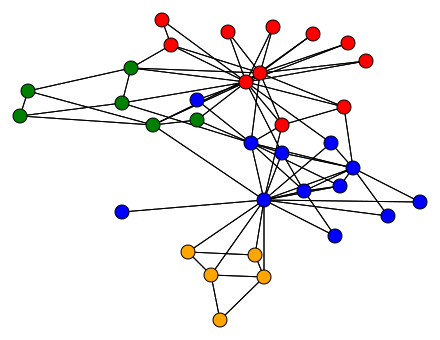

In [71]:
depth = 1
# find a clustering with n_clusters (at least n_clusters, if there is no cut with n_clusters)
labels = cut_straight(dendrogram, threshold=height - (depth - 1))
print(f"There are {len(set(labels))} clusters at depth {depth}")
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

There are 9 clusters at depth 2


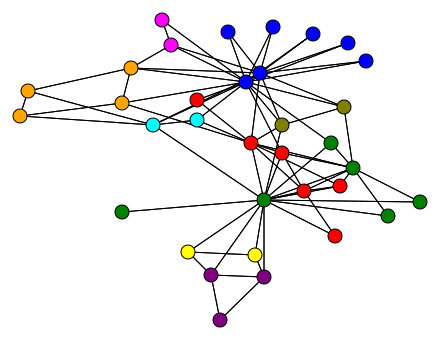

In [72]:
depth = 2
# find a clustering with n_clusters (at least n_clusters, if there is no cut with n_clusters)
labels = cut_straight(dendrogram, threshold=height - (depth - 1))
print(f"There are {len(set(labels))} clusters at depth {depth}")
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. Compare this clustering to the ground-truth labels.
* Display the graph with the top-4 clusters. Compare this clustering with that given by Louvain (depth 1). 
* Display the corresponding aggregate dendrogram (check the parameters of the function ``cut_straight``).

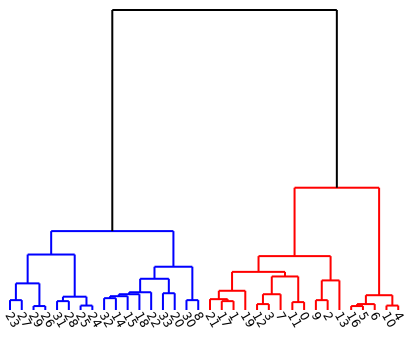

In [73]:
paris = Paris()
dendrogram = paris.fit_predict(adjacency)
image = visualize_dendrogram(dendrogram, names=np.arange(34))
SVG(image)

### Paris with 2 clusters

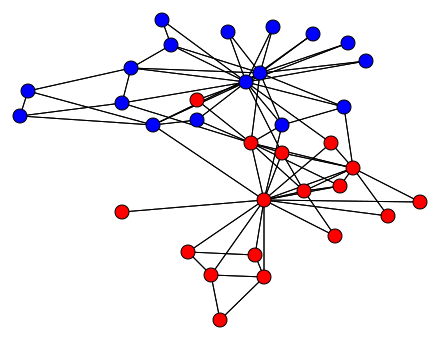

In [74]:
labels = cut_straight(dendrogram, n_clusters=2)
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

### Ground Truth

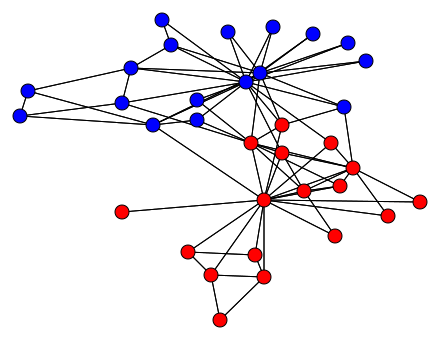

In [75]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

Pretty similar.

### Paris with 4 clusters

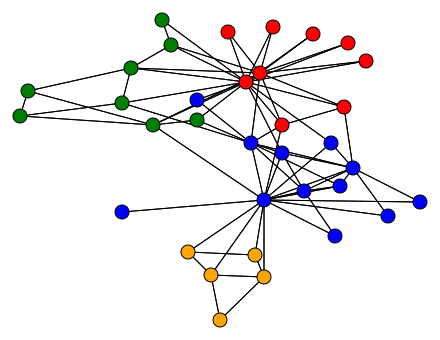

In [76]:
paris = Paris()
dendrogram = paris.fit_predict(adjacency)
labels, den = cut_straight(dendrogram, n_clusters=4, return_dendrogram=True)
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

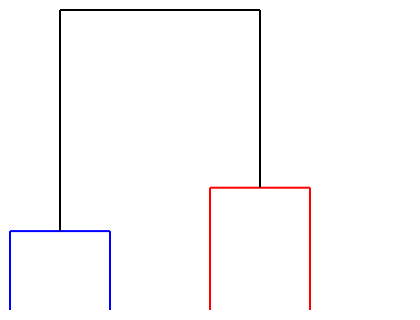

In [77]:
SVG(visualize_dendrogram(den))

### With Louvain

There are 4 clusters at depth 1


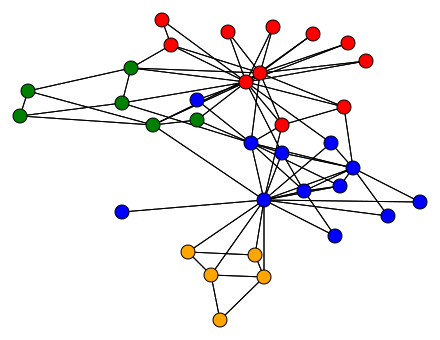

In [20]:
depth = 1
dendrogram = LouvainIteration().fit_predict(adjacency)
# find a clustering with n_clusters (at least n_clusters, if there is no cut with n_clusters)
labels = cut_straight(dendrogram, threshold=height - (depth - 1))
print(f"There are {len(set(labels))} clusters at depth {depth}")
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

Pretty similar again.

## Openflights


In [5]:
dataset = openflights

In [6]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

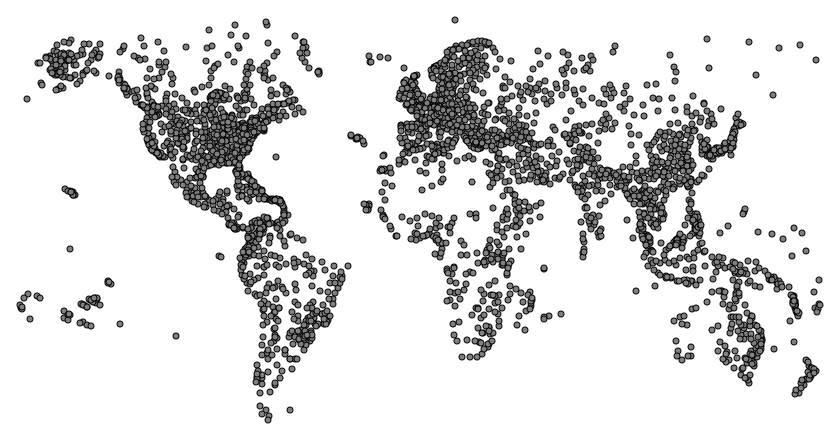

In [7]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.<br>
Refer to the [tutorial on Louvain](https://scikitnetwork.readthedocs.io/en/latest/tutorials/clustering/louvain.html#) to display the aggregate graph.
* Display the aggregate dendrogram formed by the top-40 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>Check the parameters of the function ``visualize_dendrogram`` for better visualization.

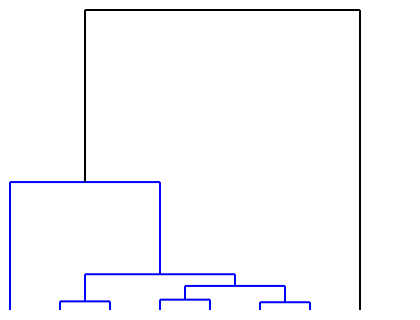

In [13]:
paris = Paris()
dendrogram = paris.fit_predict(adjacency)
labels, den = cut_straight(dendrogram, n_clusters=8, return_dendrogram=True)
membership = get_membership(labels).astype(int)
SVG(visualize_dendrogram(den))

In [9]:
from sknetwork.utils import get_membership
from sknetwork.linalg import normalize
from sknetwork.clustering import aggregate_graph

In [9]:
paris = Paris()
dendrogram = paris.fit_predict(adjacency)
labels, den = cut_straight(dendrogram, n_clusters=10, return_dendrogram=True)
membership = get_membership(labels).astype(int)

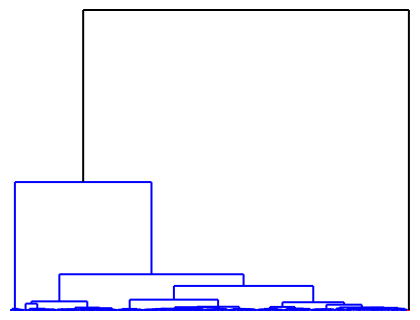

In [10]:
SVG(visualize_dendrogram(dendrogram))

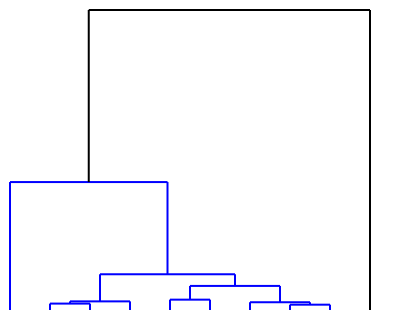

In [11]:
SVG(visualize_dendrogram(den))

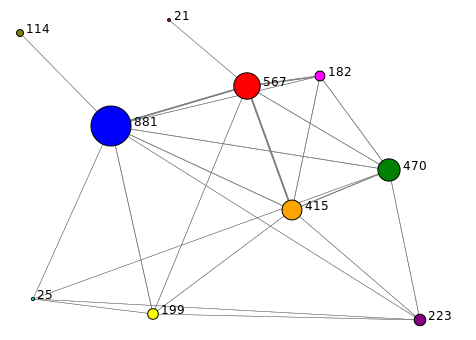

In [113]:
adjacency_aggregate = membership.T @ adjacency @ membership

average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)

image = visualize_graph(adjacency_aggregate, position_aggregate, counts, labels=labels_unique,
                  display_node_weight=True, node_weights=counts)
SVG(image)

In [114]:
SVG(visualize_graph(adjacency, position, labels=labels))

## 2. Directed graphs

## Wikipedia Vitals

In [5]:
dataset = wikivitals

In [6]:
adjacency = dataset.adjacency
names = dataset.names

In [7]:
a = (names == 'Laws of thermodynamics').nonzero()[0][0]
a

5226

In [12]:
paris = Paris()
dendrogram = paris.fit_predict(adjacency)
labels, den = cut_straight(dendrogram, n_clusters=1000, return_dendrogram=True)
membership = get_membership(labels).astype(int)
membership

<10011x1000 sparse matrix of type '<class 'numpy.int32'>'
	with 10011 stored elements in Compressed Sparse Row format>

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles (in terms of Personalized PageRank) of each of the top-40 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters, with the name of the top article of each cluster.


## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [ ]:
def get_nested_clusters(dendrogram: np.ndarray, node: int): 
    '''Get the nested clusters of a node, following the path from the corresponding leaf to the root in the dendrogram.
    
    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node
        
    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes 
        (the k-th nested cluster is the concatenation of the first k lists). 
        
    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_nested_clusters(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1
    
    cluster = {i: [i] for i in range(n)}
    nested_clusters = [[node]]
    cluster_index = node
    
    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        # to be completed
    
    return nested_clusters